<h1>Best places to open a restaurant in Dallas</h1>

Parse the webpage to extract the geo coordinates of the neihborhoods in Dallas

In [1]:
import requests
from lxml import etree
geonames_link = 'http://www.geonames.org/search.html?q=Dallas&country=US'
raw_geonames_page = requests.get(geonames_link)
tree = etree.HTML(raw_geonames_page.text)

Convert the text data into a pandas dataframe

In [2]:
import pandas as pd

dataDict = {}
for table in tree.xpath('//table[@class="restable"]'):
    for row in table.xpath('tr'):
        cols = row.xpath('td//text()')
        if len(cols)>1:
            try:
                dataDict[cols[0]] = cols
            except:
                pass
valList = [ v for v in dataDict.values() ]
df = pd.DataFrame.from_records(valList)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,,Dallas,,"DFW,Dalas,Dalasa,Dalasas,Dallas,Dallas shaary,...",32.7830556,-96.8066667,United States,", Texas",Dallas,\n,seat of a second-order administrative division,"population 1,300,092, elevation 128m",\n,N 32° 46' 59'',W 96° 48' 24''
1,2,,Mesquite,,"Meskit,Meskvit,Mesquite,mei si ji te,meseukite...",32.7667955,-96.5991593,United States,", Texas",Dallas,\n,populated place,"population 144,788, elevation 151m",\n,N 32° 46' 0'',W 96° 35' 57''
2,3,,Garland,,"Duck Creek,Embree,Garland,Garlandas,Garlend,Gi...",32.912624,-96.6388833,United States,", Texas",Dallas,\n,populated place,"population 236,897, elevation 168m",\n,N 32° 54' 45'',W 96° 38' 20''
3,4,,Dallas-Fort Worth-Arlington,Dallas-Fort Worth,32.7630265602065,-97.0326232910156,United States,", Texas",Dallas,\n,economic region,"population 6,300,006",\n,N 32° 45' 46'',W 97° 1' 57'',None
4,5,,Richardson,,"Ricardsonas,Richardson,Ričardsonas,licheodeuse...",32.9481789,-96.7297206,United States,", Texas",Dallas,\n,populated place,"population 110,815, elevation 192m",\n,N 32° 56' 53'',W 96° 43' 47''


Remove the first and second and fourth columns (Serial Number, Empty column, Empty Column ) in the data frame as it does not provide any value

In [3]:
df.drop(df.columns[[0, 1, 3]], axis=1, inplace=True)
df.head()

,2,4,5,6,7,8,9,10,11,12,13,14,15
0,Dallas,"DFW,Dalas,Dalasa,Dalasas,Dallas,Dallas shaary,...",32.7830556,-96.8066667,United States,", Texas",Dallas,\n,seat of a second-order administrative division,"population 1,300,092, elevation 128m",\n,N 32° 46' 59'',W 96° 48' 24''
1,Mesquite,"Meskit,Meskvit,Mesquite,mei si ji te,meseukite...",32.7667955,-96.5991593,United States,", Texas",Dallas,\n,populated place,"population 144,788, elevation 151m",\n,N 32° 46' 0'',W 96° 35' 57''
2,Garland,"Duck Creek,Embree,Garland,Garlandas,Garlend,Gi...",32.912624,-96.6388833,United States,", Texas",Dallas,\n,populated place,"population 236,897, elevation 168m",\n,N 32° 54' 45'',W 96° 38' 20''
3,Dallas-Fort Worth-Arlington,32.7630265602065,-97.0326232910156,United States,", Texas",Dallas,\n,economic region,"population 6,300,006",\n,N 32° 45' 46'',W 97° 1' 57'',None
4,Richardson,"Ricardsonas,Richardson,Ričardsonas,licheodeuse...",32.9481789,-96.7297206,United States,", Texas",Dallas,\n,populated place,"population 110,815, elevation 192m",\n,N 32° 56' 53'',W 96° 43' 47''


In the resulting dataframe colums 3 and 4 are not required. The data is also not consistent which is making the data unusable. For some of the rows the coordinates are in the 5th and 6th columns and for other rows in the 4th and 5th columns.
Fixing this issue by deleting data between the first column and the coordinate column (4th or 5th column depending on the row).

In [4]:
for index, row in df.iterrows():
    
    if row[15] is None:
        lastCol = 15
        while lastCol>4:
            row[lastCol] = row[lastCol-1]
            lastCol = lastCol-1

Now that the data is properly alined in their own columns. 
Drop the unnecessary columns that are not going to be used

In [5]:
df.drop(df.columns[[1, 4, 6, 7, 8, 10, 11, 12]], axis=1, inplace=True)
df.head()

,2,5,6,8,12
0,Dallas,32.7830556,-96.8066667,", Texas","population 1,300,092, elevation 128m"
1,Mesquite,32.7667955,-96.5991593,", Texas","population 144,788, elevation 151m"
2,Garland,32.912624,-96.6388833,", Texas","population 236,897, elevation 168m"
3,Dallas-Fort Worth-Arlington,32.7630265602065,-97.0326232910156,", Texas","population 6,300,006"
4,Richardson,32.9481789,-96.7297206,", Texas","population 110,815, elevation 192m"


Rename the columns so its more readable

In [6]:
df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'State', 'Population']

Remove rows that do not belong to Texas

In [7]:
for index, row in df.iterrows():
    
    row['State'] = ''.join(e for e in row['State'] if e.isalnum())
df = df[df.State == 'Texas']
df

,Neighborhood,Latitude,Longitude,State,Population
0,Dallas,32.7830556,-96.8066667,Texas,"population 1,300,092, elevation 128m"
1,Mesquite,32.7667955,-96.5991593,Texas,"population 144,788, elevation 151m"
2,Garland,32.912624,-96.6388833,Texas,"population 236,897, elevation 168m"
3,Dallas-Fort Worth-Arlington,32.7630265602065,-97.0326232910156,Texas,"population 6,300,006"
4,Richardson,32.9481789,-96.7297206,Texas,"population 110,815, elevation 192m"
5,Irving,32.8140177,-96.9488945,Texas,"population 236,607, elevation 147m"
6,Grand Prairie,32.7459645,-96.9977846,Texas,"population 187,809, elevation 157m"
7,Carrollton,32.9537349,-96.8902816,Texas,"population 133,168, elevation 161m"
8,Rowlett,32.9029017,-96.56388,Texas,"population 60,236, elevation 154m"
9,Duncanville,32.6518004,-96.9083366,Texas,"population 39,826, elevation 221m"


Discard rows that do not have population

In [8]:
#import unicode
df = df[df.Population.str.contains('population')]
for index, row in df.iterrows():
    s = row['Population'].encode('utf-8').decode('utf-8') #.split[' ']
    row['Population'] = s.split(' ')[1].rstrip(',')
df

,Neighborhood,Latitude,Longitude,State,Population
0,Dallas,32.7830556,-96.8066667,Texas,"1,300,092"
1,Mesquite,32.7667955,-96.5991593,Texas,"144,788"
2,Garland,32.912624,-96.6388833,Texas,"236,897"
3,Dallas-Fort Worth-Arlington,32.7630265602065,-97.0326232910156,Texas,"6,300,006"
4,Richardson,32.9481789,-96.7297206,Texas,"110,815"
5,Irving,32.8140177,-96.9488945,Texas,"236,607"
6,Grand Prairie,32.7459645,-96.9977846,Texas,"187,809"
7,Carrollton,32.9537349,-96.8902816,Texas,"133,168"
8,Rowlett,32.9029017,-96.56388,Texas,"60,236"
9,Duncanville,32.6518004,-96.9083366,Texas,"39,826"


<h2>Getting Location details using FourSquare</h2>

In [9]:
CLIENT_ID = '5JI0M55ZPTCAWGLYDKMIV4V11QJDPK3NH4WELPVE33XSMZOU' # your Foursquare ID
CLIENT_SECRET = 'RUCH3DB2XQ5CNHCS33ARYWZHJKGBJ2XZKOLF2DSWX03YZUFB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5JI0M55ZPTCAWGLYDKMIV4V11QJDPK3NH4WELPVE33XSMZOU
CLIENT_SECRET:RUCH3DB2XQ5CNHCS33ARYWZHJKGBJ2XZKOLF2DSWX03YZUFB


Get Restaurants in the Neighborhoods

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['venues']#[0]['categories']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'],
            v['location']['lat'],
            v['location']['lng']
        ) for v in results])
        
        restaurants_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        restaurants_df.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(restaurants_df)


In [12]:
LIMIT = 100

#df = df.drop([0,1,2,3,4,5,6,7,8,9,10,13,14,15,16,17,18,19,20], axis=0)
restaurants = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Dallas
Mesquite
Garland
Dallas-Fort Worth-Arlington
Richardson
Irving
Grand Prairie
Carrollton
Rowlett
Duncanville
DeSoto
Lancaster
Cedar Hill
Sachse
Addison
Coppell
Dallas
Seagoville
Sunnyvale
University Park
Wilmer
Farmers Branch
Balch Springs
Hutchins
Glenn Heights


In [13]:
print(restaurants.shape)
restaurants.head()

(414, 6)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Dallas,32.7830556,-96.8066667,Spaghetti Warehouse,32.782777,-96.807409
1,Dallas,32.7830556,-96.8066667,TGI Fridays,32.781922,-96.807386
2,Dallas,32.7830556,-96.8066667,Ellen's,32.781989,-96.807682
3,Dallas,32.7830556,-96.8066667,Y. O. Ranch Steakhouse,32.781300,-96.806380
4,Dallas,32.7830556,-96.8066667,Rj Mexican Cuisine,32.781539,-96.806839


Get the count of restauants in each Neighborhood

In [14]:
count_series = restaurants.groupby('Neighborhood').Neighborhood.count()

<h1>Analyzing Neighborhoods</h1>

In [15]:
count_df = pd.DataFrame({'Neighborhood':count_series.index, 'Count':count_series.values})
count_df.head()

,Neighborhood,Count
0,Addison,26
1,Balch Springs,4
2,Carrollton,47
3,Cedar Hill,15
4,Coppell,1


Merge the counts with the Location data

In [86]:
df_merged = df.join(count_df.set_index('Neighborhood'), on='Neighborhood')
df_merged.head()

,Neighborhood,Latitude,Longitude,State,Population,Count
0,Dallas,32.7830556,-96.8066667,Texas,"1,300,092",61.0
1,Mesquite,32.7667955,-96.5991593,Texas,"144,788",12.0
2,Garland,32.912624,-96.6388833,Texas,"236,897",25.0
3,Dallas-Fort Worth-Arlington,32.7630265602065,-97.0326232910156,Texas,"6,300,006",4.0
4,Richardson,32.9481789,-96.7297206,Texas,"110,815",50.0


In [87]:
df_merged = df_merged.drop(df_merged.index[[24]])

In [88]:
df_merged.head()

,Neighborhood,Latitude,Longitude,State,Population,Count
0,Dallas,32.7830556,-96.8066667,Texas,"1,300,092",61.0
1,Mesquite,32.7667955,-96.5991593,Texas,"144,788",12.0
2,Garland,32.912624,-96.6388833,Texas,"236,897",25.0
3,Dallas-Fort Worth-Arlington,32.7630265602065,-97.0326232910156,Texas,"6,300,006",4.0
4,Richardson,32.9481789,-96.7297206,Texas,"110,815",50.0


In [92]:
df_merged['Population'] = df_merged['Population'].str.replace(',', '')
df_merged['Density'] = df_merged['Population'].astype(float) / df_merged['Count'].astype(int)
df_merged['Density'] =  df_merged['Density'].round(2)
df_merged.head()

,Neighborhood,Latitude,Longitude,State,Population,Count,Density
0,Dallas,32.7830556,-96.8066667,Texas,1300092,61.0,21312.98
1,Mesquite,32.7667955,-96.5991593,Texas,144788,12.0,12065.67
2,Garland,32.912624,-96.6388833,Texas,236897,25.0,9475.88
3,Dallas-Fort Worth-Arlington,32.7630265602065,-97.0326232910156,Texas,6300006,4.0,1575001.50
4,Richardson,32.9481789,-96.7297206,Texas,110815,50.0,2216.30


Create a bar chart to visualize the data

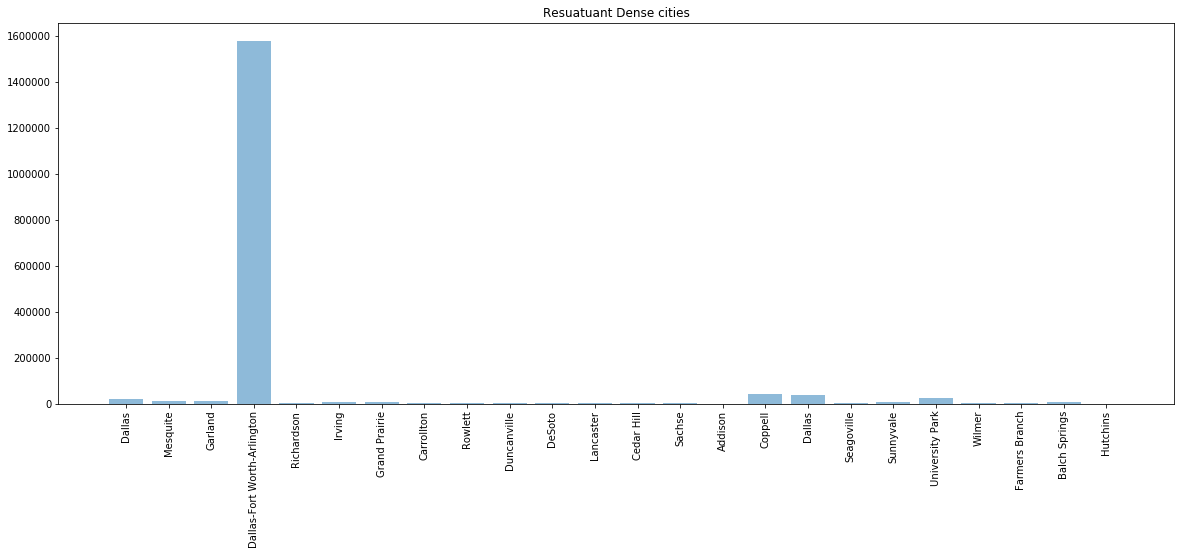

In [115]:
import numpy as np
import matplotlib.pyplot as plt
 
objects = df_merged['Neighborhood']
y_pos = np.arange(len(objects))
performance = df_merged['Density']
fig = plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Resuatuant Dense cities')
 
plt.show()